In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from CIPEC import *

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

[Qibo 0.2.14|INFO|2025-02-24 09:40:58]: Using numpy backend on /CPU:0


# 1) Single-qubit case

In [22]:
B = noiseless_basis(1,include_T=True)
print(list(B.keys()))

print("\n* Local depolarizing noise *")

# Noise Model
params = {k:1e-2*np.random.rand() for k in B.keys()}
noise_model = {k:gates.DepolarizingChannel([0],params[k]) for k in B.keys()}

# Noisy basis
B_noisy = apply_noise_to_basis(B,noise_model)

print("\n* Thermal relaxation noise *")

# Noise Model
params = {k:[1e-3,1e-3,1e-4,0.] for k in B.keys()}
noise_model = {k:gates.ThermalRelaxationChannel(0,params[k]) for k in B.keys()}

# Noisy basis
B_noisy = apply_noise_to_basis(B,noise_model)

print("\n* Amplitude damping noise *")

# Noise Model
params = {k:.99 for k in B.keys()}
noise_model = {k:gates.AmplitudeDampingChannel(0,params[k]) for k in B.keys()}

# Noisy basis
B_noisy = apply_noise_to_basis(B,noise_model)

Loaded pre-computed basis "1qbasis_cliffplusT_noiseless.csv"
[('I',), ('H',), ('S',), ('T',), ('H', 'S'), ('H', 'T'), ('S', 'H'), ('T', 'H'), ('H', 'S', 'H'), ('S', 'H', 'T'), ('Px',), ('Py',), ('Pz',)]

* Local depolarizing noise *
Applied noise model to basis elements
The noisy channels form a basis! :)

* Thermal relaxation noise *
Applied noise model to basis elements
The noisy channels form a basis! :)

* Amplitude damping noise *
Applied noise model to basis elements
The noisy channels form a basis! :)


In [23]:
B = noiseless_basis(1,include_T=False)
print(list(B.keys()))

print("\n* Local depolarizing noise *")

# Noise Model
params = {k:1e-2*np.random.rand() for k in B.keys()}
noise_model = {k:gates.DepolarizingChannel([0],params[k]) for k in B.keys()}

# Noisy basis
B_noisy = apply_noise_to_basis(B,noise_model)

print("\n* Thermal relaxation noise *")

# Noise Model
params = {k:[1e-3,1e-3,1e-4,0.] for k in B.keys()}
noise_model = {k:gates.ThermalRelaxationChannel(0,params[k]) for k in B.keys()}

# Noisy basis
B_noisy = apply_noise_to_basis(B,noise_model)

print("\n* Amplitude damping noise *")

# Noise Model
params = {k:.99 for k in B.keys()}
noise_model = {k:gates.AmplitudeDampingChannel(0,params[k]) for k in B.keys()}

# Noisy basis
B_noisy = apply_noise_to_basis(B,noise_model)

Loaded pre-computed basis "1qbasis_cliff_noiseless.csv"
[('I',), ('H',), ('S',), ('H', 'S'), ('S', 'H'), ('S', 'S'), ('H', 'S', 'H'), ('H', 'S', 'S'), ('S', 'H', 'S'), ('S', 'H', 'S', 'S'), ('Px',), ('Py',), ('Pz',)]

* Local depolarizing noise *
Applied noise model to basis elements
The noisy channels form a basis! :)

* Thermal relaxation noise *
Applied noise model to basis elements
The noisy channels form a basis! :)

* Amplitude damping noise *
Applied noise model to basis elements
The noisy channels form a basis! :)


Loaded pre-computed basis "1qbasis_cliffplusT_noiseless.csv"
Applied noise model to basis elements
The noisy channels form a basis! :)
Loaded pre-computed basis "1qbasis_cliff_noiseless.csv"
Applied noise model to basis elements
The noisy channels form a basis! :)

Using local depolarizing channels with parameters
{'I': 0.0, 'H': 0.0001, 'S': 0.0001, 'T': 0.001, 'CX': 0.01, 'XC': 0.01, 'Px': 0.001, 'Py': 0.001, 'Pz': 0.001}

Results after 1000 runs:

Clifford+T (noiseless) basis: mean(|c|_1)=43.29, var(|c|_1)=31.63
Clifford+T (noisy) basis: mean(|c|_1)=41.74, var(|c|_1)=31.1
Clifford (noiseless) basis: mean(|c|_1)=6.06, var(|c|_1)=3.72
Clifford (noisy) basis: mean(|c|_1)=5.88, var(|c|_1)=3.63


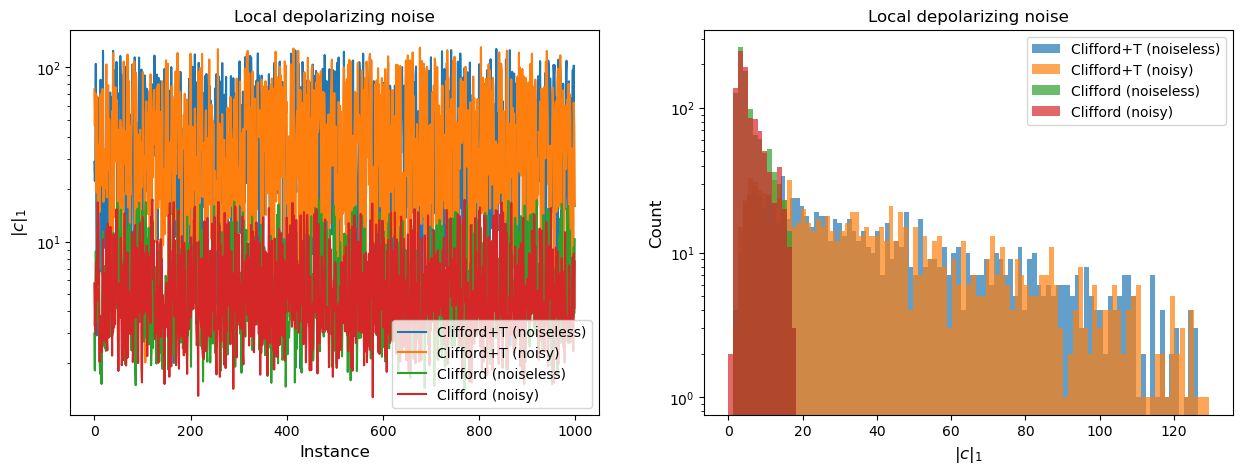

In [24]:
n_qubits = 1
n_samples = 1000

# comparing the negativity of different bases
params_basic = {'I':0., 'H': 1e-4, 'S': 1e-4, 'T': 1e-3, 'CX': 1e-2, 'XC':1e-2, 'Px':1e-3, 'Py':1e-3, 'Pz':1e-3}

B_T = noiseless_basis(n_qubits,include_T=True)
params_T = {k:np.sum([params_basic[gate] for gate in k]) for k in B_T.keys()}
noise_model_T = {k:gates.DepolarizingChannel(tuple(range(n_qubits)),params_T[k]) for k in B_T.keys()}
B_T_noisy = apply_noise_to_basis(B_T,noise_model_T)

B_Cliff = noiseless_basis(n_qubits,include_T=False)
params_Cliff = {k:np.sum([params_basic[gate] for gate in k]) for k in B_Cliff.keys()}
noise_model_Cliff = {k:gates.DepolarizingChannel(tuple(range(n_qubits)),params_Cliff[k]) for k in B_Cliff.keys()}
B_Cliff_noisy = apply_noise_to_basis(B_Cliff,noise_model_Cliff)

print(f'\nUsing local depolarizing channels with parameters\n{params_basic}')
print(f'\nResults after {n_samples} runs:\n')

# run multiple times and plot 
fig, ax = plt.subplots(1,2,figsize=(15,5))

legends = ['Clifford+T (noiseless)','Clifford+T (noisy)','Clifford (noiseless)','Clifford (noisy)']
bases = [B_T,B_T_noisy,B_Cliff,B_Cliff_noisy]
neg_max = 0 # for the histogram bins 

for name,B in zip(legends,bases):
    negativity = []
    for i in range(n_samples):
        U = gates.UnitaryChannel(tuple(range(n_qubits)),[(1.,qi.random_unitary(2**n_qubits,'haar'))]).to_choi()
        c = decomposition_coefficients(U, B)
        negativity.append(np.linalg.norm(c,1))
    print(f'{name} basis: mean(|c|_1)={np.round(np.mean(negativity),2)}, var(|c|_1)={np.round(np.sqrt(np.var(negativity)),2)}')
    neg_max = max(neg_max, np.max(negativity)) 
    ax[0].plot(negativity)
    ax[1].hist(negativity,bins=np.arange(0,neg_max,neg_max/100),alpha=0.7)

ax[0].set_title(f'Local depolarizing noise')
ax[0].set_xlabel('Instance',fontsize='large')
ax[0].set_ylabel(r'$\|c\|_1$',fontsize='large')
ax[0].set_yscale('log')
ax[0].legend(legends)
ax[1].set_title(f'Local depolarizing noise')
ax[1].set_xlabel(r'$\|c\|_1$',fontsize='large')
ax[1].set_ylabel('Count',fontsize='large')
ax[1].set_yscale('log')
ax[1].legend(legends);

# 2) Two-qubit case

In [ ]:
B = noiseless_basis(2,include_T=True)

print("\n* Local depolarizing noise *")

# Noise Model
params = {k:np.random.rand() for k in B.keys()}
noise_model = {k:gates.DepolarizingChannel([0,1],params[k]) for k in B.keys()}

# Noisy basis
B_noisy = apply_noise_to_basis(B,noise_model)

In [25]:
B = noiseless_basis(2,include_T=False)

print("\n* Local depolarizing noise *")

# Noise Model
params = {k:np.random.rand() for k in B.keys()}
noise_model = {k:gates.DepolarizingChannel([0,1],params[k]) for k in B.keys()}

# Noisy basis
B_noisy = apply_noise_to_basis(B,noise_model)

dim(CPTP)=241

Starting sequences of unitaries. There are 11110 candidate words up to L=4 to try.


  0%|          | 0/11110 [00:00<?, ?it/s]

KeyboardInterrupt: 

Loaded pre-computed basis "2qbasis_cliffplusT_noiseless.csv"
Applied noise model to basis elements
The noisy channels form a basis! :)
Loaded pre-computed basis "2qbasis_cliff_noiseless.csv"
Applied noise model to basis elements
The noisy channels form a basis! :)

Using local depolarizing channels with parameters
{'CX': 0.01, 'XC': 0.01, 'II': 0.0, 'IH': 0.0001, 'IS': 0.0001, 'IT': 0.001, 'HI': 0.0001, 'HH': 0.0002, 'HS': 0.0002, 'HT': 0.0011, 'SI': 0.0001, 'SH': 0.0002, 'SS': 0.0002, 'ST': 0.0011, 'TI': 0.001, 'TH': 0.0011, 'TS': 0.0011, 'TT': 0.002, 'IPx': 0.001, 'IPy': 0.001, 'IPz': 0.001, 'PxI': 0.001, 'PxPx': 0.002, 'PxPy': 0.002, 'PxPz': 0.002, 'PyI': 0.001, 'PyPx': 0.002, 'PyPy': 0.002, 'PyPz': 0.002, 'PzI': 0.001, 'PzPx': 0.002, 'PzPy': 0.002, 'PzPz': 0.002}

Results after 1000 runs:

Clifford+T (noiseless) basis: mean(|c|_1)=13251.62, var(|c|_1)=9258.46
Clifford+T (noisy) basis: mean(|c|_1)=13437.54, var(|c|_1)=9656.9
Clifford (noiseless) basis: mean(|c|_1)=945.06, var(|c|_1)

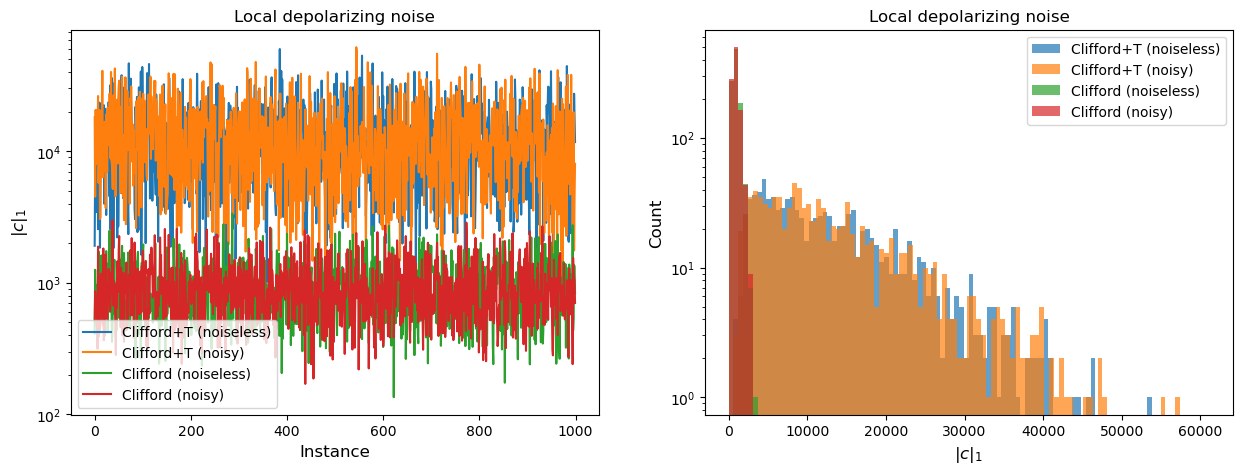

In [4]:
n_qubits = 2
n_samples = 1000

# comparing the negativity of different bases
params_basic = {'I':0., 'H': 1e-4, 'S': 1e-4, 'T': 1e-3, 'CX': 1e-2, 'XC':1e-2, 'Px':1e-3, 'Py':1e-3, 'Pz':1e-3}
params_basic = params_basic_2q(params_basic)

B_T = noiseless_basis(n_qubits,include_T=True)
params_T = {k:np.sum([params_basic[gate] for gate in k]) for k in B_T.keys()}
noise_model_T = {k:gates.DepolarizingChannel(tuple(range(n_qubits)),params_T[k]) for k in B_T.keys()}
B_T_noisy = apply_noise_to_basis(B_T,noise_model_T)

B_Cliff = noiseless_basis(n_qubits,include_T=False)
params_Cliff = {k:np.sum([params_basic[gate] for gate in k]) for k in B_Cliff.keys()}
noise_model_Cliff = {k:gates.DepolarizingChannel(tuple(range(n_qubits)),params_Cliff[k]) for k in B_Cliff.keys()}
B_Cliff_noisy = apply_noise_to_basis(B_Cliff,noise_model_Cliff)

print(f'\nUsing local depolarizing channels with parameters\n{params_basic}')
print(f'\nResults after {n_samples} runs:\n')

# run multiple times and plot 
fig, ax = plt.subplots(1,2,figsize=(15,5))

legends = ['Clifford+T (noiseless)','Clifford+T (noisy)','Clifford (noiseless)','Clifford (noisy)']
bases = [B_T,B_T_noisy,B_Cliff,B_Cliff_noisy]
neg_max = 0 # for the histogram bins 

for name,B in zip(legends,bases):
    negativity = []
    for i in range(n_samples):
        U = gates.UnitaryChannel(tuple(range(n_qubits)),[(1.,qi.random_unitary(2**n_qubits,'haar'))]).to_choi()
        c = decomposition_coefficients(U, B)
        negativity.append(np.linalg.norm(c,1))
    print(f'{name} basis: mean(|c|_1)={np.round(np.mean(negativity),2)}, var(|c|_1)={np.round(np.sqrt(np.var(negativity)),2)}')
    neg_max = max(neg_max, np.max(negativity))
    ax[0].plot(negativity)
    ax[1].hist(negativity,bins=np.arange(0,neg_max,neg_max/100),alpha=0.7)

ax[0].set_title(f'Local depolarizing noise')
ax[0].set_xlabel('Instance',fontsize='large')
ax[0].set_ylabel(r'$\|c\|_1$',fontsize='large')
ax[0].set_yscale('log')
ax[0].legend(legends)
ax[1].set_title(f'Local depolarizing noise')
ax[1].set_xlabel(r'$\|c\|_1$',fontsize='large')
ax[1].set_ylabel('Count',fontsize='large')
ax[1].set_yscale('log')
ax[1].legend(legends);